In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier


from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from category_encoders import WOEEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from category_encoders import OneHotEncoder

from mlxtend.evaluate import feature_importance_permutation
from sklearn.model_selection import train_test_split

from mlxtend.feature_extraction import PrincipalComponentAnalysis
from mlxtend.preprocessing import standardize

from mlxtend.plotting import plot_pca_correlation_graph


from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline, Pipeline

import joypy

import warnings
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [6]:
df = pd.read_csv('clean_nba_games.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace=True)
labels = df.columns


In [329]:
df.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,STL,BLK,PF,Team1,Team2,win_target,3_win_target,5_win_target,7_win_target,10_win_target
0,MEM,96,42,90,46.7,2,17,11.8,10,12,...,6,12,18,MEM,DET,True,True,True,True,True
1,DEN,107,41,88,46.6,3,23,13.0,22,32,...,10,4,19,DEN,IND,False,False,False,False,False
2,GSW,84,33,77,42.9,3,20,15.0,15,21,...,9,1,20,GSW,MIN,False,False,False,False,False
3,NOP,84,32,89,36.0,3,32,9.4,17,21,...,4,2,23,NOP,DAL,False,False,False,False,False
4,GSW,79,33,83,39.8,3,17,17.6,10,12,...,11,8,20,GSW,ATL,False,False,False,False,False


### Set Up Spread Targets

In [15]:
win = 'win_target'
ptwin3 = '3_win_target'
ptwin5 = '5_win_target'
ptwin7 = '7_win_target'
ptwin10 = '10_win_target'
yw = df[win]
y3 = df[ptwin3]
y5 = df[ptwin5]
y7 = df[ptwin7]
y10 = df[ptwin10]

target_cols = ['win_target','3_win_target','5_win_target','7_win_target', '10_win_target']

In [ ]:
yw

In [ ]:
df['Team'].isna().sum()

In [ ]:
df['Team'].unique()

**Create Dictionary of Teams**

In [4]:
team_dict = {'ATL' : 0,
             'BKN' : 1,
             'BOS' : 2,
             'CHA' : 3,
             'CHI' : 4,
             'CLE' : 5,
             'DAL' : 6,
             'DEN' : 7,
             'DET' : 8,
             'GSW' : 9,
             'HOU' : 10,
             'IND' : 11,
             'LAC' : 12,
             'LAL' : 13,
             'MEM' : 14,
             'MIA' : 15,
             'MIL' : 16,
             'MIN' : 17,
             'NOP' : 18,
             'NYK' : 19,
             'OKC' : 20,
             'ORL' : 21,
             'PHI' : 22,
             'PHX' : 23,
             'POR' : 24,
             'SAC' : 25,
             'SAS' : 26,
             'TOR' : 27,
             'UTA' : 28,
             'WAS' : 29}

**Change Teams to Number Values**

In [7]:
df['Team'] = df['Team'].map(team_dict)
df['Team1'] = df['Team1'].map(team_dict)
df['Team2'] = df['Team2'].map(team_dict)

In [8]:
df['Team2'].isna().sum()

0

In [155]:
df.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,STL,BLK,PF,Team1,Team2,win_target,3_win_target,5_win_target,7_win_target,10_win_target
0,14,96,42,90,46.7,2,17,11.8,10,12,...,6,12,18,14,8,True,True,True,True,True
1,7,107,41,88,46.6,3,23,13.0,22,32,...,10,4,19,7,11,False,False,False,False,False
2,9,84,33,77,42.9,3,20,15.0,15,21,...,9,1,20,9,17,False,False,False,False,False
3,18,84,32,89,36.0,3,32,9.4,17,21,...,4,2,23,18,6,False,False,False,False,False
4,9,79,33,83,39.8,3,17,17.6,10,12,...,11,8,20,9,0,False,False,False,False,False


## Create Naive Model

In [16]:
X = df.drop(target_cols,axis = 1)

In [301]:
X.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,Team1,Team2
0,14,96,42,90,46.7,2,17,11.8,10,12,...,7,40,47,27,11,6,12,18,14,8
1,7,107,41,88,46.6,3,23,13.0,22,32,...,12,32,44,22,9,10,4,19,7,11
2,9,84,33,77,42.9,3,20,15.0,15,21,...,7,36,43,20,17,9,1,20,9,17
3,18,84,32,89,36.0,3,32,9.4,17,21,...,8,26,34,17,15,4,2,23,18,6
4,9,79,33,83,39.8,3,17,17.6,10,12,...,18,28,46,17,25,11,8,20,9,0


In [13]:
X.columns

NameError: name 'X' is not defined

In [322]:
rox.columns

Index(['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'Team1',
       'Team2'],
      dtype='object')

**Train Model and Test Accuracy on just Winning**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, yw, test_size=0.20)

In [18]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_w = make_pipeline(scaler, lr)

model_w.fit(X_train, y_train)

train_preds = model_w.predict(X_train)
test_preds = model_w.predict(X_test)

In [189]:
train_preds

array([ True,  True,  True, ...,  True, False, False])

In [190]:
scores = cross_val_score(pipe, X, yw, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9171313841440716 +/- 0.014322601326498655


**Train Model and Test Accuracy on Winning by 3**

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.20)

In [254]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_3 = make_pipeline(scaler, lr)

model_3.fit(X_train, y_train)

train_preds = model_3.predict(X_train)
test_preds = model_3.predict(X_test)

In [255]:
scores = cross_val_score(pipe, X, y3, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9073945281009583 +/- 0.012296337194740273


**Train Model and Test Accuracy on Winning by 5**

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y5, test_size=0.20)

In [263]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_5 = make_pipeline(scaler, lr)

model_5.fit(X_train, y_train)

train_preds = model_5.predict(X_train)
test_preds = model_5.predict(X_test)

In [264]:
scores = cross_val_score(pipe, X, y5, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.8946224526900834 +/- 0.023366866319487846


**Train Model and Test Accuracy on Winning by 7**

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y7, test_size=0.20)

In [260]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_7 = make_pipeline(scaler, lr)

model_7.fit(X_train, y_train)

train_preds = model_7.predict(X_train)
test_preds = model_7.predict(X_test)

In [261]:
scores = cross_val_score(pipe, X, y7, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.8935575399268622 +/- 0.02635483820178587


**Train Model and Test Accuracy on Winning by 10**

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y10, test_size=0.20)

In [266]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_10 = make_pipeline(scaler, lr)

model_10.fit(X_train, y_train)


train_preds = model_10.predict(X_train)
test_preds = model_10.predict(X_test)

In [267]:
scores = cross_val_score(pipe, X, y10, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9017850263817511 +/- 0.021430648108705572


**Create Function for Calculating Spread**

In [174]:
def get_cross_val_scores(X,y):
    #create train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #train model and predict
    scaler = MinMaxScaler()
    lr = LogisticRegression()
    pipe = make_pipeline(scaler, lr)

    pipe.fit(X_train, y_train)

    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    
    #print out scores
    scores = cross_val_score(pipe, X, y10, cv=5, scoring='roc_auc')
    print(scores.mean(), "+/-", scores.std())

In [175]:
get_cross_val_scores(X,y3)

0.9255737740046996 +/- 0.013180348473862062


In [ ]:
def win_pipeline()

In [19]:
def stringify(data):
    df = pd.DataFrame(data)
    for c in df.columns.tolist():
        df[c] = df[c].astype(str)
    return df

binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
objectify = FunctionTransformer(func=stringify, 
                                validate=False)
clf = LogisticRegression(class_weight='balanced')
encoder = WOEEncoder()
scorecard = make_pipeline(binner, objectify, encoder, lr)


scores = cross_val_score(scorecard, X, yw, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

nan +/- nan


## Feature Importances

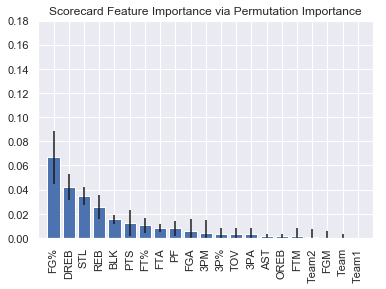

In [23]:
X = Pipeline(scorecard.steps[:-1]).fit_transform(X, yw).values
used_cols = [c for c in df.columns.tolist() if c not in [target_cols]]

X_train, X_test, y_train, y_test = train_test_split(
    X, yw, test_size=0.2, random_state=1, stratify=yw)

clf.fit(X_train, y_train)
imp_vals, imp_all = feature_importance_permutation(
    predict_method=clf.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=10,
    seed=1)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Scorecard Feature Importance via Permutation Importance")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
# plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(X.shape[1]), np.array(used_cols)[indices], rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.18])
plt.show()

## Create Average Values for Teams

In [331]:
team = df.groupby(['Team']).mean()

In [332]:
team_X = team.drop(target_cols,axis = 0)

KeyError: "['win_target' '3_win_target' '5_win_target' '7_win_target' '10_win_target'] not found in axis"

In [333]:
team_X.head()

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,Team1,Team2
Team,,,,,,,,,,,,,,,,,,,,
0,109.480769,40.057692,89.692308,44.813462,11.500000,35.365385,32.480769,17.865385,22.942308,77.776923,9.615385,33.346154,42.961538,23.211538,16.711538,8.038462,5.134615,23.250000,0.0,14.403846
1,110.680000,40.220000,90.120000,44.716000,12.800000,37.320000,34.684000,17.440000,23.600000,74.426000,10.500000,37.600000,48.100000,23.980000,15.900000,6.740000,4.640000,20.720000,1.0,14.140000
2,112.740000,41.400000,89.140000,46.530000,12.100000,33.660000,36.160000,17.840000,22.240000,80.344000,10.500000,34.900000,45.400000,23.360000,13.820000,8.360000,5.760000,21.200000,2.0,14.320000
3,103.039216,37.392157,86.117647,43.464706,12.039216,34.470588,34.578431,16.215686,21.705882,74.784314,11.019608,31.725490,42.745098,24.078431,14.921569,6.490196,4.215686,19.411765,3.0,14.294118
4,106.150943,38.962264,88.377358,44.247170,12.132075,35.226415,34.513208,16.094340,21.094340,75.979245,10.188679,32.188679,42.377358,23.094340,15.245283,9.962264,4.000000,21.264151,4.0,13.603774


In [206]:
team_X.loc[0]

PTS      109.480769
FGM       40.057692
FGA       89.692308
FG%       44.813462
3PM       11.500000
3PA       35.365385
3P%       32.480769
FTM       17.865385
FTA       22.942308
FT%       77.776923
OREB       9.615385
DREB      33.346154
REB       42.961538
AST       23.211538
TOV       16.711538
STL        8.038462
BLK        5.134615
PF        23.250000
Team1      0.000000
Team2     14.403846
Name: 0, dtype: float64

In [311]:
rox = pd.DataFrame(team_X.loc[10])

In [312]:
rox.loc['Team2'] = 6

In [313]:
rox.columns.tolist()

[10]

In [315]:
rox

,10
PTS,118.843137
FGM,41.392157
FGA,91.313725
FG%,45.450980
3PM,15.333333
3PA,43.803922
3P%,35.162745
FTM,20.725490
FTA,26.431373
FT%,78.874510


In [319]:
rox = rox.T

In [340]:
rox['Team'] = 19

In [341]:
rox.columns

Index(['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'Team1',
       'Team2', 'Team'],
      dtype='object')

In [342]:
rox

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,DREB,REB,AST,TOV,STL,BLK,PF,Team1,Team2,Team
10,118.843137,41.392157,91.313725,45.45098,15.333333,43.803922,35.162745,20.72549,26.431373,78.87451,...,35.352941,46.156863,21.588235,14.647059,8.176471,5.0,21.588235,10.0,6.0,19


In [343]:
y_predrox = model_10.predict(rox)

In [344]:
y_predrox

array([ True])

In [297]:
def winner(df,team1,team2,model):
    global team_dict
    
    team = df.groupby(['Team']).mean()
    team_X = df.drop(target_cols,axis = 1)
    first_team = pd.DataFrame(team_X.loc[team_dict[team1]]).T
    second_team = team_X.loc[team_dict[team2]]['Team']
    first_team['Team2'] = second_team
    
    print(first_team)
    y_pred = model.predict(first_team)[0]
    
    return y_pred

In [298]:
winner(df, 'HOU', 'DAL', model_10)

    Team    PTS   FGM   FGA   FG%  3PM   3PA   3P%   FTM   FTA  ...  OREB  \
10  23.0  110.0  40.0  87.0  46.0  4.0  20.0  20.0  26.0  32.0  ...  10.0   

    DREB   REB   AST   TOV  STL  BLK    PF  Team1  Team2  
10  30.0  40.0  20.0  12.0  9.0  6.0  19.0   23.0   21.0  

[1 rows x 21 columns]


True

In [244]:
team_dict

{'ATL': 0,
 'BKN': 1,
 'BOS': 2,
 'CHA': 3,
 'CHI': 4,
 'CLE': 5,
 'DAL': 6,
 'DEN': 7,
 'DET': 8,
 'GSW': 9,
 'HOU': 10,
 'IND': 11,
 'LAC': 12,
 'LAL': 13,
 'MEM': 14,
 'MIA': 15,
 'MIL': 16,
 'MIN': 17,
 'NOP': 18,
 'NYK': 19,
 'OKC': 20,
 'ORL': 21,
 'PHI': 22,
 'PHX': 23,
 'POR': 24,
 'SAC': 25,
 'SAS': 26,
 'TOR': 27,
 'UTA': 28,
 'WAS': 29}